# 6.2

In [47]:
import pysd
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy as sp

In [2]:
# load the Vensim model into Python
model = pysd.read_vensim('./SFD_Group.mdl')

In [3]:
# run the model with default parameter values
model_output = model.run()
model_output.head(5)

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Scaled divorce,Marriage rate,Delay for societal,Divorce,Societal factor,Population,...,Economic factor,Unmarried,K,Marriage,Married,Recovery rate,Divorce rate,Education,W eco,W soc
1992.00,2018,1992,0.25,0.25,340.500009,0.123413,3,6.308103e+07,0.588623,185260000.0,...,0.53333,4.179500e+07,2.2,5.158054e+06,1.132950e+08,0.004,0.556786,0.9,0.649,0.338
1992.25,2018,1992,0.25,0.25,296.979169,0.123413,3,5.501836e+07,0.588623,185260000.0,...,0.53333,4.053566e+07,2.2,5.002634e+06,9.881426e+07,0.004,0.556786,0.9,0.649,0.338
1992.50,2018,1992,0.25,0.25,259.399497,0.123413,3,4.805635e+07,0.588623,185260000.0,...,0.53333,3.931517e+07,2.2,4.852010e+06,8.631032e+07,0.004,0.556786,0.9,0.649,0.338
1992.75,2018,1992,0.25,0.25,226.937609,0.123413,3,4.204246e+07,0.588623,185260000.0,...,0.53333,3.813365e+07,2.2,4.706194e+06,7.550924e+07,0.004,0.556786,0.9,0.649,0.338
1993.00,2018,1992,0.25,0.25,198.968492,0.123205,3,3.686090e+07,0.589316,185260000.0,...,0.53333,3.699093e+07,2.2,4.557469e+06,6.617517e+07,0.004,0.557020,0.9,0.649,0.338


In [4]:
# list all stocks, variables and parameters of the model
list(model_output)

['FINAL TIME',
 'INITIAL TIME',
 'SAVEPER',
 'TIME STEP',
 'Scaled divorce',
 'Marriage rate',
 'Delay for societal',
 'Divorce',
 'Societal factor',
 'Population',
 'Delay for recovery',
 'Recovery',
 'Divorced',
 'Economic factor',
 'Unmarried',
 'K',
 'Marriage',
 'Married',
 'Recovery rate',
 'Divorce rate',
 'Education',
 'W eco',
 'W soc']

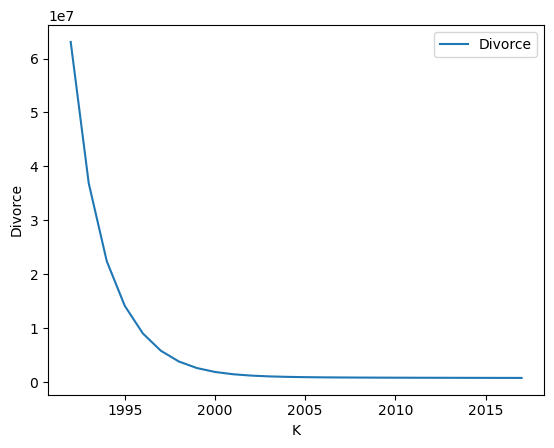

In [5]:
# plot Divorce over time 
model_output = model.run(params={'Population': 185260000.0},
                         return_timestamps=np.arange(1992, 2018, 1),
                         return_columns=['Divorce'])
model_output.plot()
plt.ylabel('Divorce')
plt.xlabel('K')
plt.show()

In [50]:
# vary the K and observe its impact on Divorce
observable = 'Divorce'
parameter1 = 'K'
parameter1_range = np.arange(-4, 4.1, 0.01)

# lists to store output values
parameter1_values = []
observable_values = []

# go through all values of parameter 1
for parameter1_value in parameter1_range:
    
    # this can be adjusted to achieve more repetitions
    for i in np.arange(0, 1, 1):

        # run the model at the given value for parameter 1
        result = model.run(params={parameter1: parameter1_value}, 
                           return_timestamps=[2018],
                           return_columns=[observable])

        # store results
        parameter1_values.append(parameter1_value)
        observable_values.append(result.loc[2018, observable])

# collect results in a DataFrame
output = pd.DataFrame({parameter1: parameter1_values, observable: observable_values})

In [51]:
# print the (average) 
output.groupby(parameter1).mean()

,Divorce
K,
-4.00,736124.624739
-3.99,736150.165228
-3.98,736175.833766
-3.97,736201.631450
-3.96,736227.559389
...,...
4.05,350188.451351
4.06,348347.543962
4.07,346513.086249


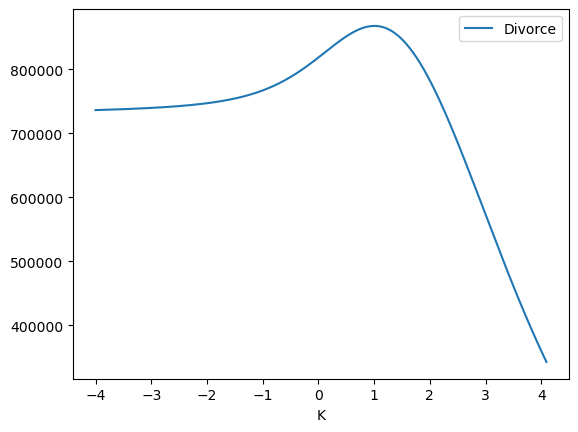

In [52]:
# plot the observable as a function of the parameter values
output.groupby(parameter1).mean().plot()
plt.show()